# Final Análisis Estadístico de Datos

**Nombre**: Oscar Ricardo Mejía Parra

**Cuatrimestre**: Agosto-Diciembre 2024 

Un experimento consiste en contar el número de partículas detectadas por un detector ($k$) sobre un total de partículas incidentes ($n$) para medir la eficiencia del detector. El experimento se repite para distintas energías de las partículas incidentes ($E$). Buscamos ajustar un modelo de la eficiencia $\varepsilon$ en función de la energía en base a los datos medidos. La siguiente tabla muestra los resultados del experimento.  

In [1]:
import numpy as np
import pandas as pd
energy = np.arange(start=0.05, stop=1.05, step=0.05)
ntrials = 30
total_particles = np.full(energy.shape, ntrials)
observed_particles = np.array([0, 0, 0, 3, 3, 2, 8, 5, 4, 11, 18, 15, 19, 20, 26, 24, 26, 29, 30, 30])
data = pd.DataFrame(data = {'Energy': energy, 'Total': total_particles, 'Observed': observed_particles})
data

,Energy,Total,Observed
0,0.05,30,0
1,0.10,30,0
2,0.15,30,0
3,0.20,30,3
4,0.25,30,3
5,0.30,30,2
6,0.35,30,8
7,0.40,30,5
8,0.45,30,4
9,0.50,30,11


**1**. Calcular el estimador de la eficiencia del detector ($\hat\varepsilon$) para cada energía

In [5]:
data['Efficiency'] = data['Observed'] / data['Total']
data['Efficiency'] = data['Efficiency'].round(2)
data

,Energy,Total,Observed,Efficiency
0,0.05,30,0,0.00
1,0.10,30,0,0.00
2,0.15,30,0,0.00
3,0.20,30,3,0.10
4,0.25,30,3,0.10
5,0.30,30,2,0.07
6,0.35,30,8,0.27
7,0.40,30,5,0.17
8,0.45,30,4,0.13
9,0.50,30,11,0.37


**2**. Graficar el estimador de la eficiencia ($\hat\varepsilon$) en función de la energía 

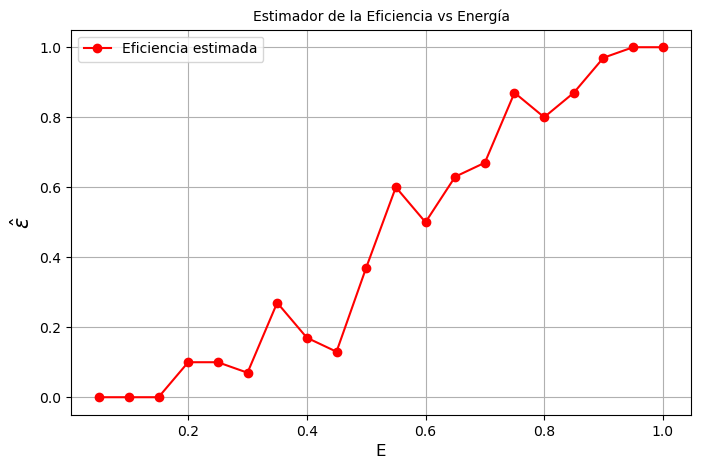

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(data['Energy'], data['Efficiency'], 'ro-', label='Eficiencia estimada')
plt.title('Estimador de la Eficiencia vs Energía', fontsize=10)
plt.xlabel('E', fontsize=12)
plt.ylabel('$\\hat{\\varepsilon}$', fontsize=15)
plt.grid()
plt.legend(fontsize=10)
plt.show()

**3**. Escribir el código para el modelo del ajuste  
El modelo de la eficiencia en función de la energía es la función sigmoide,
\begin{equation}
\varepsilon(E;a,b)=\frac{1}{1+\exp(-(E-a)/b)},
\end{equation}
con $a$ y $b$ los parámetros del ajuste. 

In [17]:
def fit_model(E, par):
    a = par[0]
    b = par[1]
    return 1 / (1 + np.exp(-(E - a) / b))

**4**. Ajustar los datos con el modelo de la eficiencia con una función de costo Binomial

In [21]:
import likefit

In [75]:
help(likefit.Binomial)

Help on class Binomial in module likefit:

class Binomial(LikelihoodFitter)
 |  Binomial(x, ntrials, nsuccess, model)
 |
 |  Binomial fitter based on the LikelihoodFitter base class.
 |
 |  Parameters
 |  ----------
 |  ntrials : array_like
 |      The number of trials data.
 |  nsuccess : array_like
 |      The number of successful trials data.
 |  model : callable
 |      The Binomial model function to fit the data.
 |
 |  Attributes
 |  ----------
 |  ntrials : array_like
 |      The number of trials data.
 |  nsuccess : array_like
 |      The number of successful trials data.
 |  model : callable
 |      The model function to fit the data.
 |
 |  Method resolution order:
 |      Binomial
 |      LikelihoodFitter
 |      abc.ABC
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(self, x, ntrials, nsuccess, model)
 |      Initialize the Binomial fitter instance.
 |
 |      Parameters
 |      ----------
 |      ntrials : array_like
 |          The number of trials da

In [23]:
fitter = likefit.Binomial(data['Energy'], data['Total'], data['Observed'], fit_model)

In [36]:
initial_parameters = np.array([0.4, 0.1])
fit_result = fitter.fit(initial_parameters)
fitter.print_results()

Fit summary
Estimators: [0.57149282 0.12099439]
Errors: [0.01447036 0.00920591]
Covariance matrix: [[2.09391409e-04 3.62288617e-06]
 [3.62288617e-06 8.47487854e-05]]
Correlation matrix: [[1.         0.02719622]
 [0.02719622 1.        ]]
Chi square: 24.01055559005025
Degrees of freedom: 18
Pvalue: 0.15468226740415675


**5**. Reportar los resultados para los parámetros $a$ y $b$ incluyendo los errores correspondientes

In [38]:
estimators = fitter.get_estimators()
errors = fitter.get_errors()
print(f"a: {estimators[0]:.3f} ± {errors[0]:.3f}")
print(f"b: {estimators[1]:.3f} ± {errors[1]:.3f}")

a: 0.571 ± 0.014
b: 0.121 ± 0.009


**6**. Reportar la correlación entre los estimadores de los parámetros $a$ y $b$

In [52]:
corr = fitter.get_correlation_matrix()[0,1]
print(f"Correlación entre a y b: {corr:.3f}")

Correlación entre a y b: 0.027


**7**. Graficar la región de confianza $1\sigma$ de los parámetros $a$ y $b$ 

In [70]:
help(fitter.plot_confidence_regions)

Help on method plot_confidence_regions in module likefit:

plot_confidence_regions(parx_index=0, pary_index=1, nsigma=2, ax=None) method of likefit.Binomial instance
    Plot the confidence regions for a pair of parameters.

    Parameters
    ----------
    parx_index : int
        Index of the x-axis parameter. The first parameter is plotted by default.
    pary_index : int
        Index of the y-axis parameter. The second parameter is plotted by default.
    nsigma : int, optional
        Number of sigma confidence levels to plot.
    ax : matplotlib.axis.Axis, optional
        Axis to make the plot.

    Returns
    -------
    None



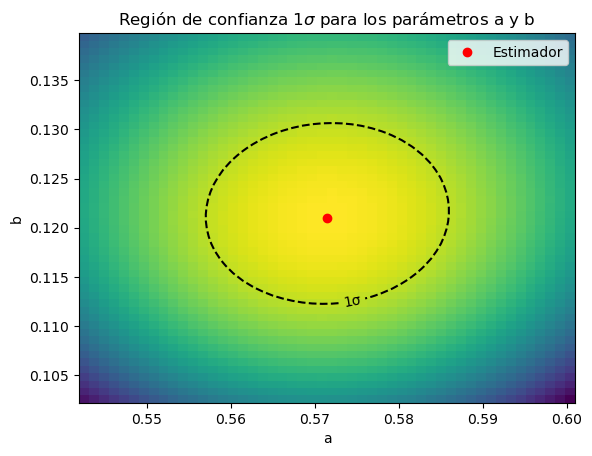

In [68]:
fig, ax = plt.subplots()
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.title.set_text("Región de confianza $1\\sigma$ para los parámetros a y b")
ax.plot(estimators[0], estimators[1], 'ro', label='Estimador')
fitter.plot_confidence_regions(nsigma = 1, ax = ax)
ax.legend()

**8**. Calcular el $\chi^2$ del ajuste y su p-valor. Decidir si el modelo es consistente con los datos.

In [105]:
chi2 = fitter.get_chi_square()
pvalue = fitter.get_pvalue()
chi = '\u03C7'
print(f"{chi}^2: {chi2:.3f}")
print(f"P-valor: {pvalue:.3f}")

χ^2: 24.011
P-valor: 0.155


El modelo es consistente con los datos, pues el valor de $\chi^2$ es cercano a los grados de libertad (18) y el p-valor es lo suficientemente grande, lo que sugiere que las discrepancias entre los datos observados y el modelo pueden explicarse por el azar, como ruido o errores propagados.

**9**. Graficar los datos y el ajuste incluyendo la banda de error del ajuste

In [110]:
help(fitter.plot_fit)

Help on method plot_fit in module likefit:

plot_fit(xlabel='x', ylabel='y', ax=None) method of likefit.Binomial instance
    Plot the data, the fit, and the error band.

    Parameters
    ----------
    xlabel : str, optional
        Label for the x-axis.
    ylabel : str, optional
        Label for the y-axis.
    ax : matplotlib.axis.Axis, optional
        Axis to make the plot.



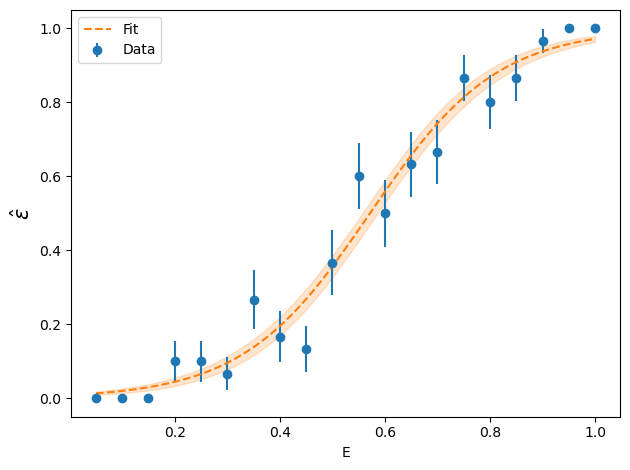

In [115]:
fig, ax = plt.subplots()
ax.set_xlabel("E")
ax.set_ylabel("$\\hat{\\varepsilon}$", fontsize=15)
fitter.plot_fit(ax=ax)